IGNORA TUTTO QUESTO FINO A CHE NON TROVI SCRITTO ALTRO

In [67]:
import pygame
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

In [68]:
class mySound:
    def __init__(self, f0 = 440, c = 340):
        self.f0 = f0  # frequency in Hertz                                                                                                                  
        self.c = c   # speed in m/s   

In [69]:
class AudioBuffer:
    def __init__(self, N, sample_rate, delta_time, bits):
        self.bits = bits
        self.delta_time = delta_time # durata (in secondi) di un intervallo                                                                                 
        self.N = N # numero di intervalli da considerare                                                                                                    
        self.sample_rate = sample_rate # frequenza di campionamento                                                                                         
        self.n_samples = int(round(delta_time*sample_rate))  # dati campionati in ogni singolo intervallo                                                   
        self.phase_acc = 0  # differenza di fase cumulata                                                                                                   
        self.audio_buffer = np.zeros((N*self.n_samples), dtype = np.int16)  # Audio buffer                                                                  
        self.max_sample = 2**(bits - 1) - 1

    def updateAudioBuffer(self, i,f):  # i e' l'intervallo in considerazione, con la frequenza f                                                            
        for s in range(self.n_samples):
            tt = float(s)/self.sample_rate    # time in seconds                                                                                             
            #grab the x-coordinate of the sine wave at a given time, while constraining the sample to what our mixer is set to with "bits"                  
            self.audio_buffer[i*self.n_samples+s] = int(round(self.max_sample*math.sin(self.phase_acc + 2*math.pi*f*tt)))

        phase = (f*self.delta_time - np.floor(f*self.delta_time))*2*np.pi
        self.phase_acc += phase

    def makeSoundWithAudioBuffer(self):
        #the number of channels specified here is NOT                                                                                                       
        #the channels talked about here http://www.pygame.org/docs/ref/mixer.html#pygame.mixer.get_num_channels                                             
        pygame.mixer.pre_init(self.sample_rate, -self.bits, 1)
        pygame.init()
        sound = pygame.sndarray.make_sound(self.audio_buffer)
        sound.play()

        wait_time = int(self.N*self.delta_time +1)*1000
        pygame.time.wait(wait_time)
        pygame.quit()

    def makeSoundWithAudioBuffer2(self):
        sound = ipd.Audio(self.audio_buffer, rate=self.sample_rate, autoplay=True)
        display(sound)





In [70]:
class Particle:
    d2r =  math.pi / 180;

    def __init__(self, x0=0, y0=0, v0=0,v0_angle=0, a=0, a_angle=0, mru=True):
        self.x0 = x0  # initial (t=0 s) x pos in m                                                                                                          
        self.y0 = y0  # initial (t=0 s) y pos in m                                                                                                          
        self.v0 = v0   # constant speed in m/s                                                                                                              
        self.v0_angle = v0_angle   # speed direction in degree                                                                                              
        self.v0x = self.v0*math.cos(self.v0_angle*self.d2r)
        self.v0y = self.v0*math.sin(self.v0_angle*self.d2r)
        self.mru = mru
        if self.mru == False:
            self.a = a   # constant speed in m/s                                                                                                            
            self.a_angle = a_angle   # speed direction in degree                                                                                            
            self.ax = self.a*math.cos(self.a_angle*self.d2r)
            self.ay = self.a*math.sin(self.a_angle*self.d2r)
        else:
            self.a = 0   # constant speed in m/s                                                                                                            
            self.a_angle = 0   # speed direction in degree                                                                                                  
            self.ax = 0
            self.ay = 0

    # return x-pos at time t                                                                                                                                
    def get_x(self, t):
        return self.x0 + self.v0x*t + 0.5*self.ax*(t**2)

    # return y-pos at time t                                                                                                                                
    def get_y(self, t):
        return self.y0 + self.v0y*t + 0.5*self.ay*(t**2)

    # return x-vel at time t                                                                                                                                
    def get_vx(self, t):
        if self.mru == True:
            return self.v0x
        else:
            return self.v0x + self.ax*t

    # return y-vel at time t                                                                                                                                
    def get_vy(self, t):
        if self.mru == True:
            return self.v0y
        else:
            return self.v0y + self.ay*t

In [71]:
class GraphBuffer:
    # data_to_plot[0,i] = t                                                                                                                                 
    # data_to_plot[1,i] = Delta_t                                                                                                                           
    # data_to_plot[2,i] = A_xt                                                                                                                              
    # data_to_plot[3,i] = A_yt                                                                                                                              
    # data_to_plot[4,i] = A_x                                                                                                                               
    # data_to_plot[5,i] = A_y                                                                                                                               
    # data_to_plot[6,i] = B_x                                                                                                                               
    # data_to_plot[7,i] = B_y                                                                                                                               
    # data_to_plot[8,i] = f                                                                                                                                 

    def __init__(self, N):
        self.data_to_plot = np.empty([9,N], dtype = np.float32)
        self.last_used = 0
        self.Ndata = N

    def updateGraphBuffer(self, new_data):
        assert(self.last_used < self.Ndata)
        for j in range(0,9):
            self.data_to_plot[j,self.last_used] = new_data[j]
        self.last_used += 1

    def plotGraphBuffer(self):
        plt.rcParams['figure.figsize'] = [10, 8]
        fig, (ax1, ax2) = plt.subplots(2)

        ax1.set_title('posizioni')
        ax1.set_xlabel('$\it{x}$ [m]')
        ax1.set_ylabel('$\it{y}$ [m]')
        ax1.plot(self.data_to_plot[2], self.data_to_plot[3])
        ax1.plot(self.data_to_plot[6], self.data_to_plot[7])

        ax2.set_title('frequenza')
        ax2.set_xlabel('$\it{t}$ [s]')
        ax2.set_ylabel('$\it{f}$ [Hz]')
        ax2.plot(self.data_to_plot[0], self.data_to_plot[8])

        ax1.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax2.grid(visible=True, which='major', color='#666666', linestyle='-')
        
        fig.tight_layout()
        #plt.grid()
        plt.show(block = False)



In [72]:
def updatePosAndFreq(t, A, B, S, i):
    A_x = A.get_x(t)
    A_y = A.get_y(t)
    A_vx = A.get_vx(t)
    A_vy = A.get_vy(t)

    B_x = B.get_x(t)
    B_y = B.get_y(t)
    B_vx = B.get_vx(t)
    B_vy = B.get_vy(t)

    d_0x = B_x - A_x
    d_0y = B_y - A_y
    d_0 = math.sqrt(d_0x**2 + d_0y**2)

    delta = (d_0*S.c)**2 - (d_0x*A_vy - d_0y*A_vx)**2

    Delta_t = ( -d_0x*A_vx - d_0y*A_vy + math.sqrt(delta) )/(S.c**2 - A.v0**2)

    A_xt = A.get_x(t-Delta_t)
    A_yt = A.get_y(t-Delta_t)

    d_x = B_x - A_xt;
    d_y = B_y - A_yt;
    d = math.sqrt(d_x**2 + d_y**2);

    v_Ad = (A_vx*d_x + A_vy*d_y)/d;
    v_Bd = (B_vx*d_x + B_vy*d_y)/d;

    f = (  (S.c - v_Bd) / (S.c-v_Ad)  ) * S.f0;

    updated_data = tuple((t, Delta_t, A_xt, A_yt, A_x, A_y, B_x, B_y, f))

    # f is updated_data[8]                                                                                                                                  
    return updated_data



DA QUI IN POI PUOI INIZIARE A MODIFICARE
DA QUI IN POI PUOI INIZIARE A MODIFICARE
DA QUI IN POI PUOI INIZIARE A MODIFICARE
DA QUI IN POI PUOI INIZIARE A MODIFICARE
DA QUI IN POI PUOI INIZIARE A MODIFICARE

In [73]:
def main():
    ########################################################################
    #                                                                      #
    #                      frequenza velocità del suono                    #
    #                                                                      #
    ########################################################################
    S = mySound(f0 = 440, c = 340)


    ########################################################################
    #                                                                      #
    #       posizione iniziale e velocità COSTANTE della sorgente          #
    #                                                                      #
    ########################################################################
    x_A0 = 0
    y_A0 = 0
    v_A = 30
    v_angle_A = 50
    mru_A = True # NON TOCCARE
    A = Particle(x_A0, y_A0, v_A, v_angle_A)
    
    
    ########################################################################
    #                                                                      #
    # posizione iniale, velocità iniziale e accelerazione dell'osservatore #
    #                                                                      #
    ########################################################################
    x_B0 = 70
    y_B0 = 0
    v_B = 15
    v_angle_B = 120
    a_B = 5
    a_angle_B = 30
    mru_B = False # NON TOCCARE
    B = Particle(x_B0, y_B0, v_B, v_angle_B, a_B, a_angle_B, mru_B)
    
    ########################################################################
    #                                                                      #
    #      durata del moto (in secondi) e numero di punti da prendere      #
    #                                                                      #
    ########################################################################
    start_time = 0  # NON TOCCARE
    end_time = 10
    N = 10000
    delta_time = (end_time - start_time)/N
    
    ########################################################################
    #                                                                      #
    #                    QUI SOTTO NON TOCCARE PIÙ NULLA!                  #
    #                                                                      #
    ########################################################################
    
    # data buffer to sound
    bits = 16
    sample_rate = 44100   # sampling rate, Hz, must be integer
    buf = AudioBuffer(N, sample_rate, delta_time, bits)

    # data to be plotted
    graph_data = GraphBuffer(N)

    #  for (double t = start_time; t<end_time; t+=delta_time)
    for i in range(0,N):
        t = i*delta_time
        updated_data  = updatePosAndFreq(t, A, B, S, i)
        f = updated_data[8]

        graph_data.updateGraphBuffer(updated_data)
        buf.updateAudioBuffer(i,f)


    graph_data.plotGraphBuffer()
    buf.makeSoundWithAudioBuffer2()

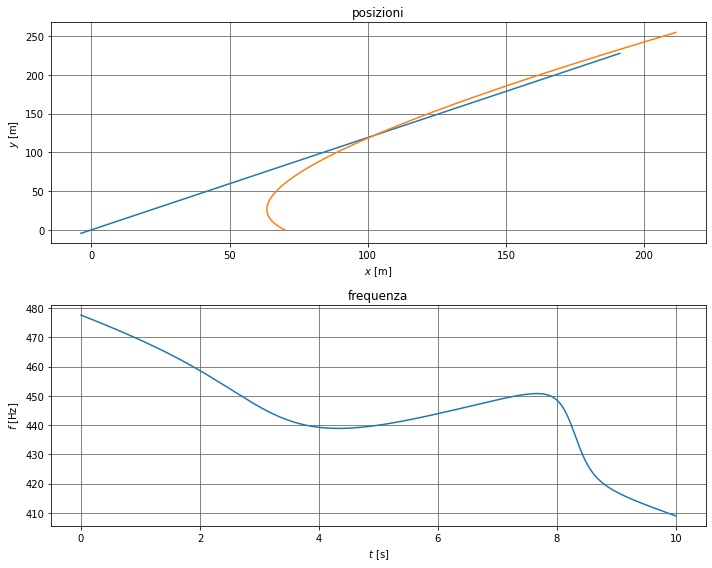

In [74]:
main()